In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(10)

#step 1/5 生成数据

In [2]:
sample_nums = 100
mean_value = 1.7
bias = 1

In [3]:
n_data = torch.ones(sample_nums, 2)
n_data.shape

torch.Size([100, 2])

In [4]:
x0 = torch.normal(mean_value * n_data, 1) + bias # 类别0 数据 
x0.shape

torch.Size([100, 2])

In [5]:
y0 = torch.zeros(sample_nums)   # 类别0 标签 
y0.shape

torch.Size([100])

In [6]:
x1 = torch.normal(-mean_value * n_data, 1) + bias # 类别1 数据
x1.shape 

torch.Size([100, 2])

In [7]:
y1 = torch.zeros(sample_nums)   # 类别1 标签 
y1.shape

torch.Size([100])

In [8]:
train_x = torch.cat((x0, x1), 0) #　竖着拼接
train_x
train_x.shape

torch.Size([200, 2])

In [9]:
train_y = torch.cat((y0, y1), 0)  
train_y.shape

torch.Size([200])

#step 2/5 选择模型

In [10]:
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.features = nn.Linear(2, 1) # self.features = nn.Linear(2, 1): 创建一个线性层（nn.Linear），这是逻辑回归模型的唯一一层。这一层有两个输入特征（2）和一个输出（1）。
        self.sigmoid = nn.Sigmoid() # 创建一个Sigmoid激活函数层（nn.Sigmoid），用于将线性层的输出转换为概率值，以进行二分类预测。

    def forward(self, x):
        x = self.features(x) 
        x = self.sigmoid(x)
        return x

In [11]:
lr_net = LR()   # 实例化逻辑回归模型

#step 3/5 选择损失函数

In [12]:
loss_fn = nn.BCELoss()  # 对数损失函数交叉熵函数

#step 4/5 选择优化器

In [13]:
lr = 0.01  # 学习率

In [14]:
optimizer = torch.optim.SGD(lr_net.parameters(), lr=lr, momentum=0.9)

#step 5/5 模型训练 

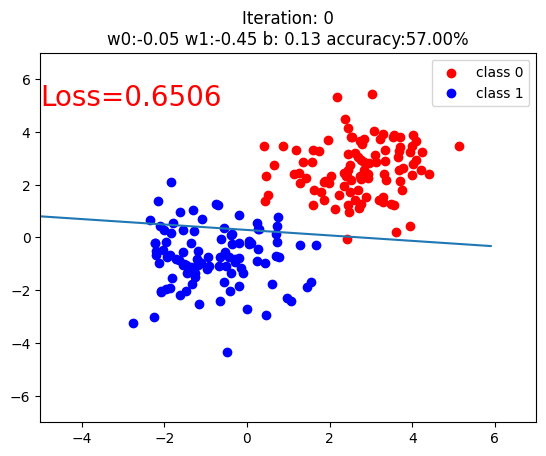

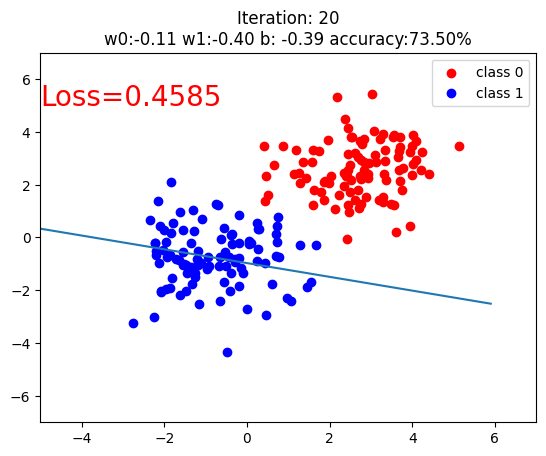

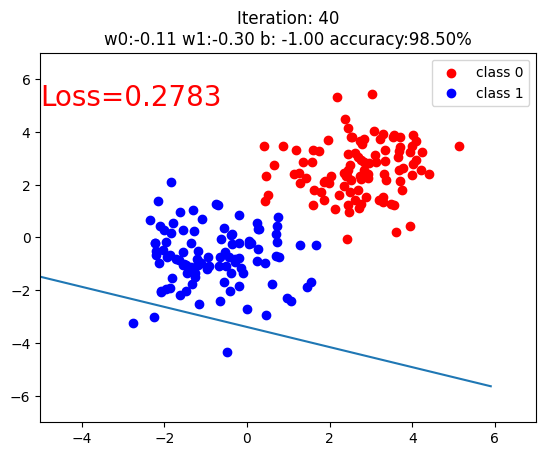

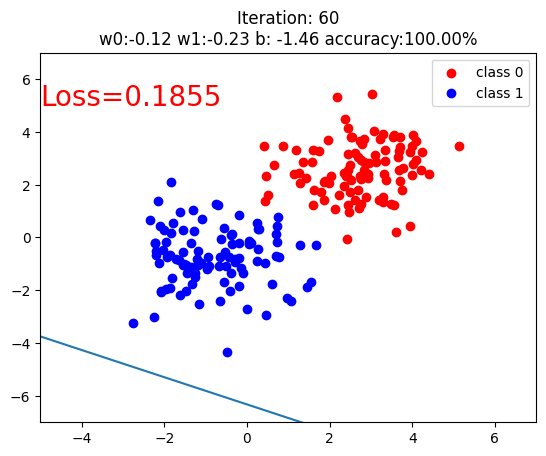

In [15]:
for iteration in range(1000):

    # 前向传播
    y_pred = lr_net(train_x)

    # 计算预测值y_pred与真实值train_y之间的损失loss。
    loss = loss_fn(y_pred.squeeze(), train_y)
    
    # 清空梯度
    optimizer.zero_grad()

    # 使用反向传播算法计算损失函数对于每个参数的梯度，并将梯度保存在参数的.grad属性中
    loss.backward()

    # 更新参数
    optimizer.step()

   

    # 绘图
    if iteration % 20 == 0:

        '1. y_pred.ge(0.5):将y_pred中每个元素与0.5进行比较，返回一个布尔类型的张量，表示每个元素是否大于等于0.5。'
        '2. .float():将布尔类型的张量转换为浮点类型的张量，其中True对应的值为1.0，False对应的值为0.0。'
        '3. squeeze():将张量中维度为1的维度去掉，得到一个一维张量。'
        mask = y_pred.ge(0.5).float().squeeze()  # 以0.5为阈值进行分类
        correct = (mask == train_y).sum()  # 计算正确预测的样本个数
        acc = correct.item() / train_y.size(0)  # 计算分类准确率

        plt.scatter(x0.data.numpy()[:, 0], x0.data.numpy()[:, 1], c='r', label='class 0')
        plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='b', label='class 1')

        w0, w1 = lr_net.features.weight[0] 
        w0, w1 = float(w0.item()), float(w1.item())
        plot_b = float(lr_net.features.bias[0].item())
        plot_x = np.arange(-6, 6, 0.1)
        plot_y = (-w0 * plot_x - plot_b) / w1

        plt.xlim(-5, 7)
        plt.ylim(-7, 7)
        plt.plot(plot_x, plot_y)

        plt.text(-5, 5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.title("Iteration: {}\nw0:{:.2f} w1:{:.2f} b: {:.2f} accuracy:{:.2%}".format(iteration, w0, w1, plot_b, acc))
        plt.legend()

        plt.show()
        plt.pause(0.5)

        if acc > 0.99:
            break
